# Crytosystem Identifier Using Back Propagation Neural Network

In [34]:
import numpy as np
import os
from sklearn.utils import shuffle
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense
import collections
from collections import Counter

In [35]:
#Function for Reading Data from a Text File
def read_text_file(fname):
    with open(fname,'r') as f:
        text=f.readlines()
    for i in range(len(text)):
        text[i]=text[i].rstrip("\n")
    return text

#Function for Converting the text array into its respective ASCII value.
def txt_char(arr,size=200):
    a=len(arr)
    res=32*np.ones((a,size))
    for i in range(a):
        arr[i]+=" "
        for j in range(size):
            res[i,j]=ord(arr[i][j])
    return res

In [36]:
#We have Extracted frequency features from the Data.
def extract_features(arr,f=7):
    res=[]
    for i in arr:
        a=Counter(i)
        r=list(a.values())
        s=np.sort(r)
        res.append([np.mean(s[:f]),np.mean(s[-1*f:])])
    return np.array(res)

In [37]:
def train(train_features,train_labels,valid_features,valid_labels,hid_1,input_dim=2,epochs=50,verb=2):
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = hid_1, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Fitting the ANN to the Training set
    classifier.fit(train_features, train_labels, batch_size = 10, epochs = 50, validation_data=(valid_features,valid_labels),verbose=verb)
    
    return classifier

In [38]:
#Reading of Training Data
sub_data=read_text_file(os.path.join('Dataset','sub_train.txt')) 
vig_data=read_text_file(os.path.join('Dataset','vig_train.txt')) 

shuffle(sub_data)
shuffle(vig_data)

sub_train,sub_val=sub_data[:40],sub_data[40:]
vig_train,vig_val=vig_data[:40],vig_data[40:]

#Reading of Testing Data
sub_test=read_text_file(os.path.join('Dataset','sub_test.txt'))
vig_test=read_text_file(os.path.join('Dataset','vig_test.txt'))

sen_train=np.asarray(sub_train+vig_train)
sen_valid=np.asarray(sub_val+vig_val)
sen_test=np.asarray(sub_test+vig_test)

train_data=txt_char(sen_train)
valid_data=txt_char(sen_valid)
test_data=txt_char(sen_test)

train_labels=np.asarray([0]*len(sub_train)+[1]*len(vig_train))
valid_labels=np.asarray([0]*len(sub_val)+[1]*len(vig_val))
test_labels=np.asarray([0]*len(sub_test)+[1]*len(vig_test))

In [39]:
freq=5   ### FREQUENCY VECTOR DECIDER
neuron_variation=list(range(5,101,5)) # No. of neurons varys from 5 to 100 in step of 5
Accuracy_neuron=[] 
for hid1 in neuron_variation:
    train_features=extract_features(train_data,freq)
    valid_features=extract_features(valid_data,freq)
    test_features=extract_features(test_data,freq)

    train_labels=train_labels.reshape((train_labels.shape[0],1))
    valid_labels=valid_labels.reshape((valid_labels.shape[0],1))
    test_labels=test_labels.reshape((test_labels.shape[0],1))
    classifier=train(train_features,train_labels,valid_features,valid_labels,hid1,verb=1,epochs=100)
    test_out=classifier.predict(test_features)
    test_predict=test_out>0.5
    accuracy=(test_predict==test_labels).sum()/20.0
    print (hid1,accuracy)
    Accuracy_neuron.append(accuracy)
    print(" ")

Train on 80 samples, validate on 20 samples
Epoch 1/50
80/80 [==============================] - 4s 53ms/step - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6928 - val_acc: 0.5500
Epoch 2/50
80/80 [==============================] - 0s 353us/step - loss: 0.6925 - acc: 0.5125 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 3/50
80/80 [==============================] - 0s 401us/step - loss: 0.6923 - acc: 0.5000 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 4/50
80/80 [==============================] - 0s 375us/step - loss: 0.6915 - acc: 0.5000 - val_loss: 0.6914 - val_acc: 0.5000
Epoch 5/50
80/80 [==============================] - 0s 371us/step - loss: 0.6914 - acc: 0.5000 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 6/50
80/80 [==============================] - 0s 426us/step - loss: 0.6907 - acc: 0.5000 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 7/50
80/80 [==============================] - 0s 426us/step - loss: 0.6906 - acc: 0.5000 - val_loss: 0.6902 - val_acc: 0.5000
Epoch 8/50
80/80 [===============

80/80 [==============================] - 0s 363us/step - loss: 0.6918 - acc: 0.5000 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 13/50
80/80 [==============================] - 0s 351us/step - loss: 0.6914 - acc: 0.5000 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 14/50
80/80 [==============================] - 0s 338us/step - loss: 0.6912 - acc: 0.5000 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 15/50
80/80 [==============================] - 0s 338us/step - loss: 0.6907 - acc: 0.5000 - val_loss: 0.6904 - val_acc: 0.5000
Epoch 16/50
80/80 [==============================] - 0s 375us/step - loss: 0.6903 - acc: 0.5000 - val_loss: 0.6899 - val_acc: 0.5000
Epoch 17/50
80/80 [==============================] - 0s 363us/step - loss: 0.6897 - acc: 0.5000 - val_loss: 0.6894 - val_acc: 0.5000
Epoch 18/50
80/80 [==============================] - 0s 364us/step - loss: 0.6893 - acc: 0.5000 - val_loss: 0.6889 - val_acc: 0.5000
Epoch 19/50
80/80 [==============================] - 0s 363us/step - loss: 0.6887

80/80 [==============================] - 0s 301us/step - loss: 0.6726 - acc: 0.5000 - val_loss: 0.6759 - val_acc: 0.5000
Epoch 24/50
80/80 [==============================] - 0s 313us/step - loss: 0.6710 - acc: 0.5000 - val_loss: 0.6748 - val_acc: 0.5000
Epoch 25/50
80/80 [==============================] - 0s 351us/step - loss: 0.6690 - acc: 0.5250 - val_loss: 0.6734 - val_acc: 0.5000
Epoch 26/50
80/80 [==============================] - 0s 313us/step - loss: 0.6671 - acc: 0.5125 - val_loss: 0.6721 - val_acc: 0.5000
Epoch 27/50
80/80 [==============================] - 0s 313us/step - loss: 0.6649 - acc: 0.5250 - val_loss: 0.6706 - val_acc: 0.5000
Epoch 28/50
80/80 [==============================] - 0s 338us/step - loss: 0.6627 - acc: 0.5375 - val_loss: 0.6690 - val_acc: 0.5000
Epoch 29/50
80/80 [==============================] - 0s 351us/step - loss: 0.6604 - acc: 0.5500 - val_loss: 0.6674 - val_acc: 0.5000
Epoch 30/50
80/80 [==============================] - 0s 689us/step - loss: 0.6580

80/80 [==============================] - 0s 338us/step - loss: 0.6412 - acc: 0.6375 - val_loss: 0.6553 - val_acc: 0.5000
Epoch 35/50
80/80 [==============================] - 0s 363us/step - loss: 0.6373 - acc: 0.6875 - val_loss: 0.6530 - val_acc: 0.5500
Epoch 36/50
80/80 [==============================] - 0s 339us/step - loss: 0.6364 - acc: 0.7000 - val_loss: 0.6505 - val_acc: 0.6000
Epoch 37/50
80/80 [==============================] - 0s 338us/step - loss: 0.6312 - acc: 0.7125 - val_loss: 0.6482 - val_acc: 0.6000
Epoch 38/50
80/80 [==============================] - 0s 338us/step - loss: 0.6280 - acc: 0.7125 - val_loss: 0.6464 - val_acc: 0.6000
Epoch 39/50
80/80 [==============================] - 0s 363us/step - loss: 0.6241 - acc: 0.7000 - val_loss: 0.6444 - val_acc: 0.6000
Epoch 40/50
80/80 [==============================] - 0s 363us/step - loss: 0.6229 - acc: 0.7000 - val_loss: 0.6428 - val_acc: 0.5500
Epoch 41/50
80/80 [==============================] - 0s 351us/step - loss: 0.6212

80/80 [==============================] - 0s 326us/step - loss: 0.5901 - acc: 0.7125 - val_loss: 0.6222 - val_acc: 0.6000
Epoch 46/50
80/80 [==============================] - 0s 313us/step - loss: 0.5839 - acc: 0.7625 - val_loss: 0.6175 - val_acc: 0.7000
Epoch 47/50
80/80 [==============================] - 0s 301us/step - loss: 0.5792 - acc: 0.8125 - val_loss: 0.6136 - val_acc: 0.7000
Epoch 48/50
80/80 [==============================] - 0s 351us/step - loss: 0.5751 - acc: 0.8000 - val_loss: 0.6099 - val_acc: 0.7500
Epoch 49/50
80/80 [==============================] - 0s 313us/step - loss: 0.5716 - acc: 0.7750 - val_loss: 0.6080 - val_acc: 0.7000
Epoch 50/50
80/80 [==============================] - 0s 313us/step - loss: 0.5660 - acc: 0.7875 - val_loss: 0.6051 - val_acc: 0.7000
25 0.8
 
Train on 80 samples, validate on 20 samples
Epoch 1/50
80/80 [==============================] - 3s 33ms/step - loss: 0.6919 - acc: 0.5000 - val_loss: 0.6904 - val_acc: 0.5000
Epoch 2/50
80/80 [============

80/80 [==============================] - 0s 301us/step - loss: 0.6874 - acc: 0.5000 - val_loss: 0.6864 - val_acc: 0.5000
Epoch 7/50
80/80 [==============================] - 0s 301us/step - loss: 0.6862 - acc: 0.5000 - val_loss: 0.6858 - val_acc: 0.5000
Epoch 8/50
80/80 [==============================] - 0s 314us/step - loss: 0.6850 - acc: 0.5000 - val_loss: 0.6850 - val_acc: 0.5000
Epoch 9/50
80/80 [==============================] - 0s 324us/step - loss: 0.6838 - acc: 0.5000 - val_loss: 0.6841 - val_acc: 0.5000
Epoch 10/50
80/80 [==============================] - 0s 300us/step - loss: 0.6826 - acc: 0.5000 - val_loss: 0.6830 - val_acc: 0.5000
Epoch 11/50
80/80 [==============================] - 0s 351us/step - loss: 0.6809 - acc: 0.5000 - val_loss: 0.6819 - val_acc: 0.5000
Epoch 12/50
80/80 [==============================] - 0s 314us/step - loss: 0.6794 - acc: 0.5000 - val_loss: 0.6808 - val_acc: 0.5000
Epoch 13/50
80/80 [==============================] - 0s 314us/step - loss: 0.6778 - 

80/80 [==============================] - 0s 326us/step - loss: 0.6739 - acc: 0.5000 - val_loss: 0.6769 - val_acc: 0.5000
Epoch 18/50
80/80 [==============================] - 0s 301us/step - loss: 0.6725 - acc: 0.5000 - val_loss: 0.6757 - val_acc: 0.5000
Epoch 19/50
80/80 [==============================] - 0s 314us/step - loss: 0.6702 - acc: 0.5250 - val_loss: 0.6745 - val_acc: 0.5000
Epoch 20/50
80/80 [==============================] - 0s 374us/step - loss: 0.6691 - acc: 0.5500 - val_loss: 0.6731 - val_acc: 0.5000
Epoch 21/50
80/80 [==============================] - 0s 314us/step - loss: 0.6686 - acc: 0.5250 - val_loss: 0.6714 - val_acc: 0.5000
Epoch 22/50
80/80 [==============================] - 0s 313us/step - loss: 0.6631 - acc: 0.5250 - val_loss: 0.6699 - val_acc: 0.5000
Epoch 23/50
80/80 [==============================] - 0s 300us/step - loss: 0.6606 - acc: 0.5500 - val_loss: 0.6680 - val_acc: 0.5000
Epoch 24/50
80/80 [==============================] - 0s 326us/step - loss: 0.6594

80/80 [==============================] - 0s 300us/step - loss: 0.6254 - acc: 0.7125 - val_loss: 0.6452 - val_acc: 0.6000
Epoch 29/50
80/80 [==============================] - 0s 313us/step - loss: 0.6212 - acc: 0.7125 - val_loss: 0.6416 - val_acc: 0.6000
Epoch 30/50
80/80 [==============================] - 0s 313us/step - loss: 0.6180 - acc: 0.7125 - val_loss: 0.6395 - val_acc: 0.6000
Epoch 31/50
80/80 [==============================] - 0s 326us/step - loss: 0.6127 - acc: 0.7125 - val_loss: 0.6345 - val_acc: 0.7000
Epoch 32/50
80/80 [==============================] - 0s 301us/step - loss: 0.6058 - acc: 0.8000 - val_loss: 0.6311 - val_acc: 0.7500
Epoch 33/50
80/80 [==============================] - 0s 326us/step - loss: 0.6084 - acc: 0.7625 - val_loss: 0.6279 - val_acc: 0.8000
Epoch 34/50
80/80 [==============================] - 0s 301us/step - loss: 0.5957 - acc: 0.7875 - val_loss: 0.6258 - val_acc: 0.6000
Epoch 35/50
80/80 [==============================] - 0s 301us/step - loss: 0.5944

80/80 [==============================] - 0s 326us/step - loss: 0.5701 - acc: 0.7625 - val_loss: 0.6083 - val_acc: 0.6000
Epoch 40/50
80/80 [==============================] - 0s 326us/step - loss: 0.5632 - acc: 0.7875 - val_loss: 0.6007 - val_acc: 0.7500
Epoch 41/50
80/80 [==============================] - 0s 362us/step - loss: 0.5607 - acc: 0.8000 - val_loss: 0.5961 - val_acc: 0.8000
Epoch 42/50
80/80 [==============================] - 0s 339us/step - loss: 0.5552 - acc: 0.7750 - val_loss: 0.5964 - val_acc: 0.7000
Epoch 43/50
80/80 [==============================] - 0s 406us/step - loss: 0.5474 - acc: 0.7875 - val_loss: 0.5946 - val_acc: 0.7000
Epoch 44/50
80/80 [==============================] - 0s 351us/step - loss: 0.5424 - acc: 0.7875 - val_loss: 0.5898 - val_acc: 0.7000
Epoch 45/50
80/80 [==============================] - 0s 315us/step - loss: 0.5374 - acc: 0.8250 - val_loss: 0.5835 - val_acc: 0.7500
Epoch 46/50
80/80 [==============================] - 0s 326us/step - loss: 0.5324

80/80 [==============================] - 0s 333us/step - loss: 0.4942 - acc: 0.8000 - val_loss: 0.5521 - val_acc: 0.8000
55 0.85
 
Train on 80 samples, validate on 20 samples
Epoch 1/50
80/80 [==============================] - 3s 35ms/step - loss: 0.6887 - acc: 0.5000 - val_loss: 0.6864 - val_acc: 0.5000
Epoch 2/50
80/80 [==============================] - 0s 426us/step - loss: 0.6883 - acc: 0.5000 - val_loss: 0.6860 - val_acc: 0.5000
Epoch 3/50
80/80 [==============================] - 0s 401us/step - loss: 0.6862 - acc: 0.5000 - val_loss: 0.6849 - val_acc: 0.5000
Epoch 4/50
80/80 [==============================] - 0s 401us/step - loss: 0.6850 - acc: 0.5000 - val_loss: 0.6843 - val_acc: 0.5000
Epoch 5/50
80/80 [==============================] - 0s 351us/step - loss: 0.6838 - acc: 0.5000 - val_loss: 0.6832 - val_acc: 0.5000
Epoch 6/50
80/80 [==============================] - 0s 326us/step - loss: 0.6824 - acc: 0.5000 - val_loss: 0.6822 - val_acc: 0.5000
Epoch 7/50
80/80 [================

80/80 [==============================] - 0s 376us/step - loss: 0.6766 - acc: 0.5000 - val_loss: 0.6759 - val_acc: 0.5000
Epoch 12/50
80/80 [==============================] - 0s 376us/step - loss: 0.6706 - acc: 0.5000 - val_loss: 0.6741 - val_acc: 0.5000
Epoch 13/50
80/80 [==============================] - 0s 351us/step - loss: 0.6683 - acc: 0.5375 - val_loss: 0.6725 - val_acc: 0.5000
Epoch 14/50
80/80 [==============================] - 0s 466us/step - loss: 0.6644 - acc: 0.5500 - val_loss: 0.6705 - val_acc: 0.5000
Epoch 15/50
80/80 [==============================] - 0s 392us/step - loss: 0.6630 - acc: 0.5875 - val_loss: 0.6687 - val_acc: 0.5000
Epoch 16/50
80/80 [==============================] - 0s 401us/step - loss: 0.6588 - acc: 0.6125 - val_loss: 0.6663 - val_acc: 0.5000
Epoch 17/50
80/80 [==============================] - 0s 376us/step - loss: 0.6545 - acc: 0.5500 - val_loss: 0.6637 - val_acc: 0.5000
Epoch 18/50
80/80 [==============================] - 0s 376us/step - loss: 0.6504

80/80 [==============================] - 0s 390us/step - loss: 0.6448 - acc: 0.6750 - val_loss: 0.6576 - val_acc: 0.5500
Epoch 23/50
80/80 [==============================] - 0s 353us/step - loss: 0.6407 - acc: 0.6875 - val_loss: 0.6548 - val_acc: 0.5500
Epoch 24/50
80/80 [==============================] - 0s 351us/step - loss: 0.6363 - acc: 0.7000 - val_loss: 0.6519 - val_acc: 0.6000
Epoch 25/50
80/80 [==============================] - 0s 401us/step - loss: 0.6324 - acc: 0.7125 - val_loss: 0.6489 - val_acc: 0.6000
Epoch 26/50
80/80 [==============================] - 0s 375us/step - loss: 0.6273 - acc: 0.7125 - val_loss: 0.6461 - val_acc: 0.6000
Epoch 27/50
80/80 [==============================] - 0s 363us/step - loss: 0.6226 - acc: 0.7250 - val_loss: 0.6426 - val_acc: 0.6000
Epoch 28/50
80/80 [==============================] - 0s 376us/step - loss: 0.6171 - acc: 0.7250 - val_loss: 0.6393 - val_acc: 0.6000
Epoch 29/50
80/80 [==============================] - 0s 363us/step - loss: 0.6126

80/80 [==============================] - 0s 376us/step - loss: 0.5830 - acc: 0.8000 - val_loss: 0.6162 - val_acc: 0.7500
Epoch 34/50
80/80 [==============================] - 0s 353us/step - loss: 0.5776 - acc: 0.8000 - val_loss: 0.6117 - val_acc: 0.8000
Epoch 35/50
80/80 [==============================] - 0s 339us/step - loss: 0.5708 - acc: 0.8000 - val_loss: 0.6081 - val_acc: 0.7500
Epoch 36/50
80/80 [==============================] - 0s 388us/step - loss: 0.5651 - acc: 0.7875 - val_loss: 0.6041 - val_acc: 0.7000
Epoch 37/50
80/80 [==============================] - 0s 363us/step - loss: 0.5604 - acc: 0.7750 - val_loss: 0.5984 - val_acc: 0.8000
Epoch 38/50
80/80 [==============================] - 0s 376us/step - loss: 0.5513 - acc: 0.8000 - val_loss: 0.5951 - val_acc: 0.7500
Epoch 39/50
80/80 [==============================] - 0s 389us/step - loss: 0.5489 - acc: 0.7875 - val_loss: 0.5964 - val_acc: 0.7000
Epoch 40/50
80/80 [==============================] - 0s 376us/step - loss: 0.5403

80/80 [==============================] - 0s 389us/step - loss: 0.5315 - acc: 0.7875 - val_loss: 0.5793 - val_acc: 0.7000
Epoch 45/50
80/80 [==============================] - 0s 376us/step - loss: 0.5262 - acc: 0.7625 - val_loss: 0.5698 - val_acc: 0.8000
Epoch 46/50
80/80 [==============================] - 0s 338us/step - loss: 0.5145 - acc: 0.7750 - val_loss: 0.5677 - val_acc: 0.7500
Epoch 47/50
80/80 [==============================] - 0s 351us/step - loss: 0.5140 - acc: 0.7750 - val_loss: 0.5729 - val_acc: 0.7000
Epoch 48/50
80/80 [==============================] - 0s 376us/step - loss: 0.5066 - acc: 0.8250 - val_loss: 0.5584 - val_acc: 0.8000
Epoch 49/50
80/80 [==============================] - 0s 363us/step - loss: 0.5022 - acc: 0.8000 - val_loss: 0.5540 - val_acc: 0.8000
Epoch 50/50
80/80 [==============================] - 0s 364us/step - loss: 0.4988 - acc: 0.7750 - val_loss: 0.5521 - val_acc: 0.8000
80 0.85
 
Train on 80 samples, validate on 20 samples
Epoch 1/50
80/80 [=========

Epoch 5/50
80/80 [==============================] - 0s 313us/step - loss: 0.6840 - acc: 0.5000 - val_loss: 0.6828 - val_acc: 0.5000
Epoch 6/50
80/80 [==============================] - 0s 338us/step - loss: 0.6809 - acc: 0.5000 - val_loss: 0.6818 - val_acc: 0.5000
Epoch 7/50
80/80 [==============================] - 0s 363us/step - loss: 0.6793 - acc: 0.5000 - val_loss: 0.6808 - val_acc: 0.5000
Epoch 8/50
80/80 [==============================] - 0s 338us/step - loss: 0.6773 - acc: 0.5000 - val_loss: 0.6793 - val_acc: 0.5000
Epoch 9/50
80/80 [==============================] - 0s 326us/step - loss: 0.6753 - acc: 0.5000 - val_loss: 0.6779 - val_acc: 0.5000
Epoch 10/50
80/80 [==============================] - 0s 376us/step - loss: 0.6729 - acc: 0.5000 - val_loss: 0.6766 - val_acc: 0.5000
Epoch 11/50
80/80 [==============================] - 0s 364us/step - loss: 0.6706 - acc: 0.5250 - val_loss: 0.6750 - val_acc: 0.5000
Epoch 12/50
80/80 [==============================] - 0s 350us/step - loss:

80/80 [==============================] - 0s 363us/step - loss: 0.6596 - acc: 0.5500 - val_loss: 0.6639 - val_acc: 0.5000
Epoch 17/50
80/80 [==============================] - 0s 389us/step - loss: 0.6496 - acc: 0.6500 - val_loss: 0.6608 - val_acc: 0.5500
Epoch 18/50
80/80 [==============================] - 0s 363us/step - loss: 0.6472 - acc: 0.7250 - val_loss: 0.6585 - val_acc: 0.6000
Epoch 19/50
80/80 [==============================] - 0s 364us/step - loss: 0.6409 - acc: 0.7125 - val_loss: 0.6555 - val_acc: 0.6000
Epoch 20/50
80/80 [==============================] - 0s 377us/step - loss: 0.6360 - acc: 0.7125 - val_loss: 0.6524 - val_acc: 0.6000
Epoch 21/50
80/80 [==============================] - 0s 401us/step - loss: 0.6320 - acc: 0.7125 - val_loss: 0.6489 - val_acc: 0.6000
Epoch 22/50
80/80 [==============================] - 0s 363us/step - loss: 0.6255 - acc: 0.7125 - val_loss: 0.6457 - val_acc: 0.6000
Epoch 23/50
80/80 [==============================] - 0s 388us/step - loss: 0.6227

80/80 [==============================] - 0s 376us/step - loss: 0.5969 - acc: 0.7625 - val_loss: 0.6254 - val_acc: 0.7000
Epoch 28/50
80/80 [==============================] - 0s 439us/step - loss: 0.5897 - acc: 0.7750 - val_loss: 0.6214 - val_acc: 0.7000
Epoch 29/50
80/80 [==============================] - 0s 376us/step - loss: 0.5856 - acc: 0.7250 - val_loss: 0.6180 - val_acc: 0.6000
Epoch 30/50
80/80 [==============================] - 0s 363us/step - loss: 0.5754 - acc: 0.8000 - val_loss: 0.6113 - val_acc: 0.8000
Epoch 31/50
80/80 [==============================] - 0s 413us/step - loss: 0.5707 - acc: 0.7875 - val_loss: 0.6064 - val_acc: 0.8000
Epoch 32/50
80/80 [==============================] - 0s 426us/step - loss: 0.5667 - acc: 0.7750 - val_loss: 0.6027 - val_acc: 0.7500
Epoch 33/50
80/80 [==============================] - 0s 376us/step - loss: 0.5563 - acc: 0.8000 - val_loss: 0.5999 - val_acc: 0.7000
Epoch 34/50
80/80 [==============================] - 0s 389us/step - loss: 0.5520

In [40]:
print(np.vstack([neuron_variation, Accuracy_neuron]).T)

[[   5.      0.65]
 [  10.      0.65]
 [  15.      0.85]
 [  20.      0.8 ]
 [  25.      0.8 ]
 [  30.      0.8 ]
 [  35.      0.85]
 [  40.      0.85]
 [  45.      0.85]
 [  50.      0.85]
 [  55.      0.85]
 [  60.      0.85]
 [  65.      0.85]
 [  70.      0.85]
 [  75.      0.85]
 [  80.      0.85]
 [  85.      0.8 ]
 [  90.      0.85]
 [  95.      0.85]
 [ 100.      0.8 ]]


In [41]:
hid_neuron=50 ## No. of neurons in hidden layer
frequency_variation=list(range(1,9,1)) ## Frequency decider varies from 1 to 8
Accuracy_freq=[]
for fq in frequency_variation:
    train_features=extract_features(train_data,fq)
    valid_features=extract_features(valid_data,fq)
    test_features=extract_features(test_data,fq)

    train_labels=train_labels.reshape((train_labels.shape[0],1))
    valid_labels=valid_labels.reshape((valid_labels.shape[0],1))
    test_labels=test_labels.reshape((test_labels.shape[0],1))
    classifier=train(train_features,train_labels,valid_features,valid_labels,hid_neuron,verb=0,epochs=100)
    test_out=classifier.predict(test_features)
    test_predict=test_out>0.5
    accuracy=(test_predict==test_labels).sum()/20.0
    print(fq,accuracy)
    Accuracy_freq.append(accuracy)

1 0.45
2 0.55
3 0.8
4 0.8
5 0.85
6 0.85
7 0.8
8 0.8


In [42]:
print(np.vstack([frequency_variation, Accuracy_freq]).T)

[[ 1.    0.45]
 [ 2.    0.55]
 [ 3.    0.8 ]
 [ 4.    0.8 ]
 [ 5.    0.85]
 [ 6.    0.85]
 [ 7.    0.8 ]
 [ 8.    0.8 ]]


## After this use matplotlib to plot accuracy vs frequency curve and Accuracy vs neuron_variation curve :)

Text(0.5,1,'Frequency VS Accuracy')

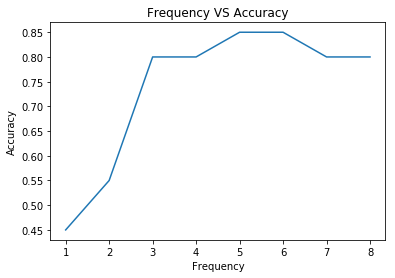

In [43]:
plt.plot(frequency_variation,Accuracy_freq)
plt.xlabel('Frequency')
plt.ylabel('Accuracy')
plt.title('Frequency VS Accuracy')

Text(0.5,1,'Number of Neurons VS Accuracy')

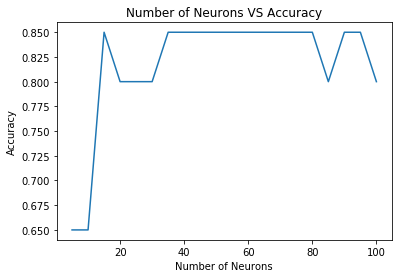

In [44]:
plt.plot(neuron_variation, Accuracy_neuron)
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Number of Neurons VS Accuracy')